SVD Truncada é uma versão da SVD que limita o número de componentes usados para a decomposição, permitindo reduzir a dimensionalidade de forma eficiente, especialmente quando lidamos com grandes conjuntos de dados.

Diferença entre PCA e SVD Truncada:

    PCA é uma técnica de análise de componentes principais que se baseia na decomposição da matriz de covariância dos dados. O PCA calcula os autovalores e autovetores da matriz de covariância e, em seguida, projeta os dados em um novo espaço baseado nesses autovetores (componentes principais).

    SVD truncada (Truncated SVD), por outro lado, realiza uma decomposição singular de valores da matriz de dados diretamente, sem a necessidade de calcular a matriz de covariância. A SVD decompõe a matriz XX em três matrizes:
    X=UΣVT
    X=UΣVT

    Onde:

        UU contém os autovetores à esquerda,

        ΣΣ contém os valores singulares (relacionados à variância dos dados),

        VTVT contém os autovetores à direita.

    A SVD truncada é uma forma de usar apenas os primeiros kk componentes, similar ao PCA, mas diretamente via SVD.

In [1]:
#Bibliothek

import matplotlib.pyplot as plt
import numpy as np
import os
import random
import scipy.io
from PIL import Image 
from sklearn.decomposition import PCA
from matplotlib import image as mimage



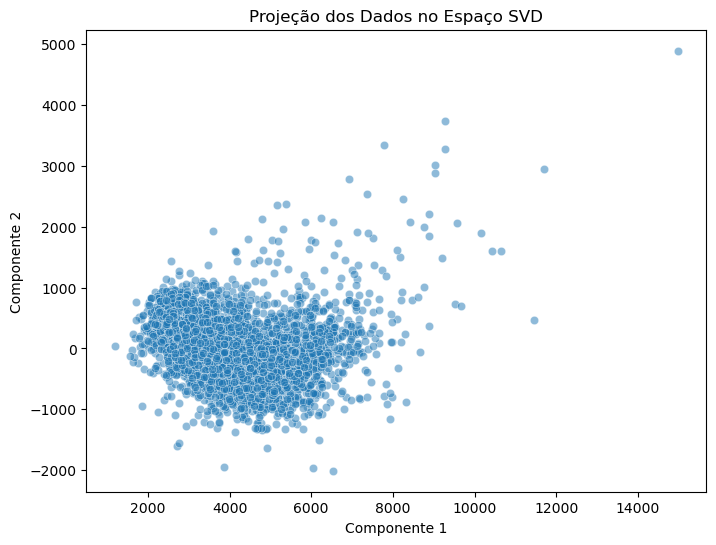

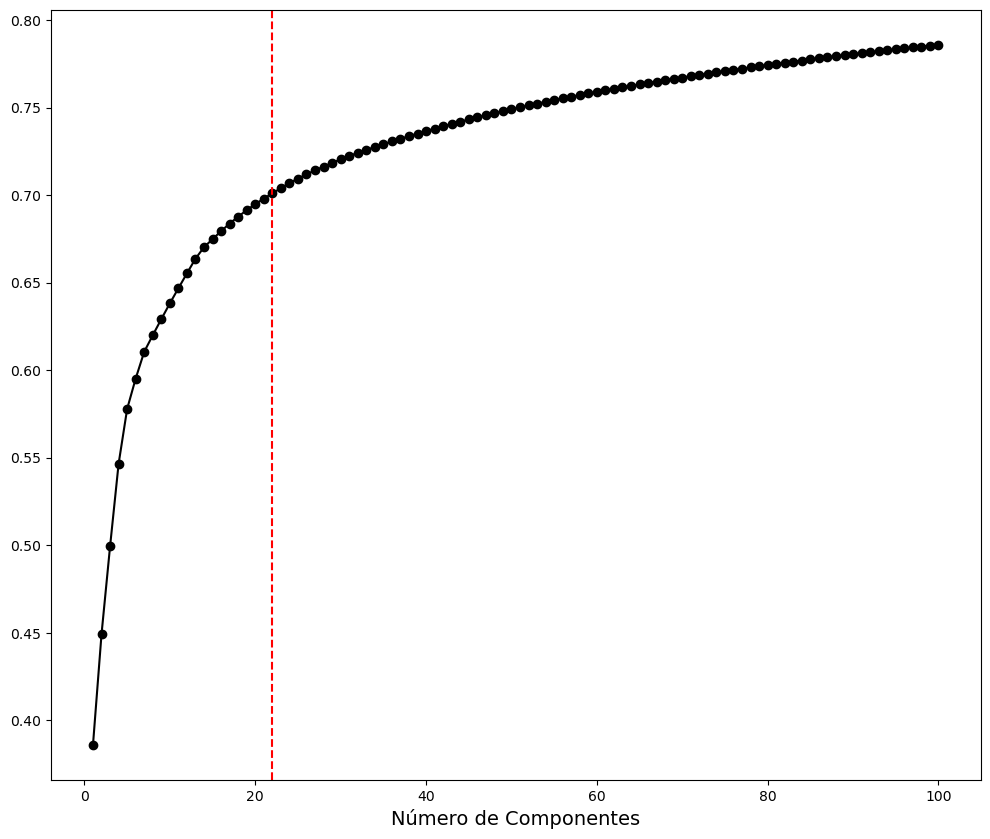

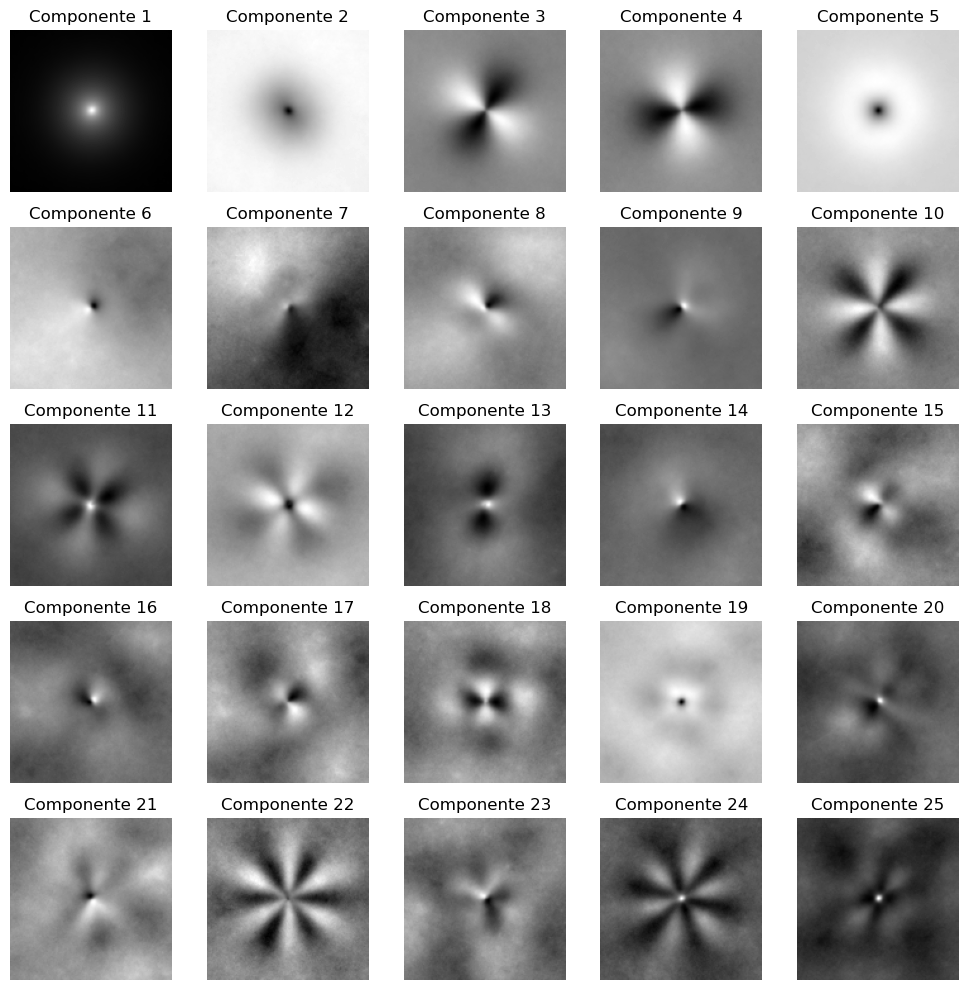

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
import numpy as np

# Diretório das imagens
base_dir = './png'
image_size = (128, 128)  # Ajuste conforme o tamanho das imagens de galáxias
image_shape = np.prod(image_size)  # Número total de pixels por imagem

# Inicializar a lista para armazenar as imagens
image_list = []

# Obter todos os arquivos de imagem no diretório
image_files = [f for f in os.listdir(base_dir) if f.endswith('.png')]  # Ajuste a extensão conforme necessário

# Carregar e processar cada imagem
for image_name in image_files:
    img_path = os.path.join(base_dir, image_name)
    img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
    img = img.resize(image_size)  # Redimensiona a imagem, se necessário
    img_array = np.array(img).flatten()  # Achata a imagem
    image_list.append(img_array)

# Verificar se a lista de imagens está vazia
if not image_list:
    raise ValueError("Nenhuma imagem foi carregada. Verifique o diretório e os arquivos.")

# Convertendo a lista para um array numpy
X = np.array(image_list)

# Verificar se X tem pelo menos 2 dimensões
if len(X.shape) != 2:
    raise ValueError("O array X não tem o formato esperado. Verifique o carregamento das imagens.")

# Defina o número de componentes
n_components = 100  # Ajuste conforme necessário
svd = TruncatedSVD(n_components=n_components)

# Ajustar o modelo aos dados
svd.fit(X)

# Transformar os dados no espaço reduzido
X_svd = svd.transform(X)

# Plotar a projeção no espaço SVD (Componente 1 vs Componente 2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], alpha=0.5)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Projeção dos Dados no Espaço SVD")
plt.show()

# Variância explicada acumulada
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

# Encontrar o ponto de saturação (cotovelo) - 70% de variância explicada
threshold = 0.70
elbow_point = np.argmax(cumulative_variance >= threshold) + 1

# Plotar a Curva de Elbow com variância acumulada
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='black', marker='o', linestyle='-')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Ponto de Saturação 70% de variância explicada: ({elbow_point})')

# Ajustes de estilo
plt.xlabel('Número de Componentes', fontsize=14)

# Plotar as primeiras componentes principais em um grid 5x5
fig, axes = plt.subplots(5, 5, figsize=(10, 10))  # Grid 5x5 para visualização das componentes
for i, ax in enumerate(axes.flat):
    if i < n_components:
        component = svd.components_[i].reshape(128, 128)  # Ajuste para o tamanho original da imagem
        ax.imshow(component, cmap='gray')
        ax.set_title(f"Componente {i+1}")
        ax.axis("off")

plt.tight_layout()
plt.show()
